In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2
import warnings
import glob

### Function for file reading

In [3]:
def myfn(img,i, margin=5 , limit=700):
    edged = cv2.Canny(img, 10, 220)
    dff=pd.DataFrame(edged)
    cnt,x1 , x2 ,y1,y2=0,0,0,0,0
    for i in range(margin ,dff.shape[1]-margin):

        if (x1==0) & (dff.iloc[:,i].sum() > limit) :
            x1=i
            cnt+=1
        if (x2==0) & (dff.iloc[:,-i].sum() > limit) :
            x2=-i
            cnt+=1
        if cnt ==2:
            break
    cnt=0
    for i in range(margin ,dff.shape[0]-margin):

        if (y1==0) & (dff.iloc[i,:].sum() > limit) :
            y1=i
            cnt+=1
        if (y2==0) & (dff.iloc[-i,:].sum() > limit) :
            y2=-i
            cnt+=1
        if cnt ==2:
            break
    # print(x1,x2,y1,y2)
    im = img[ y1:dff.shape[0]-margin+y2 , x1:dff.shape[1]-margin+x2]
    imr = cv2.resize(im, (200, 250), interpolation = cv2.INTER_LINEAR)
    # cv2.imwrite(f"{i}.jpg",imr)
    return(imr)

In [4]:
def openfiles(filename : list):

    warnings.filterwarnings('ignore')
    df=pd.DataFrame()

    for i in range(1,len(filename)):
        # print(i)
        try:
            img = cv2.imread(filename[i],cv2.IMREAD_GRAYSCALE)
            im=myfn(img,i)
            df=df.append(pd.DataFrame(im.reshape(-1, 1).T))
            # print(df.info())
        except:
            print('error:',i)
    return(df)


In [5]:
dfl0= openfiles((glob.glob('./data/no/*.*')))
dfl1= openfiles((glob.glob('./data/yes/*.*')))
dfl1['l']=1
dfl0['l']=0
df=dfl0.append(dfl1)

error: 36


libpng error: Read Error


error: 69
error: 75
error: 43
error: 57
error: 82
error: 88


In [552]:
df

,0,1,2,3,4,5,6,7,8,9,...,49991,49992,49993,49994,49995,49996,49997,49998,49999,l
0,12,8,9,13,14,14,14,14,14,14,...,11,11,11,11,11,11,11,11,11,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,10,10,10,10,10,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,1,3,0,1,0,0,0,2,...,7,1,1,3,1,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Modelling definisiton

In [6]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, confusion_matrix ,classification_report , accuracy_score ,f1_score , RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier,Perceptron,LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier , BaggingClassifier,AdaBoostClassifier
import warnings
import math

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85 )

### Modelling Functions

In [8]:
errors = pd.DataFrame(columns=['accuracy' , 'r2_score' ,'rmsep' ])
def err(name,model,X_train, y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    r2_score=metrics.r2_score(y_test, y_predict) 
    rmsep = 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / y_test.mean(),2)
    errors.loc[name, :] = [accuracy ,r2_score, rmsep ]
    return(y_predict)

In [9]:
def rocplot(name, y_test, y_predict):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot()


### Modelling

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
در ابتدا از 
PCA
استفاده شد ولی باتوجه به کم بودن سمپلها جواب خوبی نمیدهد
بنابراین روشهای انسمبل احتمالا بهتر جواب دهد

In [ ]:
sgd=SGDClassifier()
pca=PCA()
pipe = make_pipeline(StandardScaler(),PCA(),SGDClassifier())
model = GridSearchCV(pipe, param_grid=
                     {'sgdclassifier__loss': ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber',
                                              'epsilon_insensitive', 'squared_epsilon_insensitive']})
err("SGDClassifier",model,X_train, y_train,X_test,y_test)
# rocplot("SGDClassifier", y_test, y_predict)
errors

In [12]:
errors

,accuracy,r2_score,rmsep
PerceptronGridsearch,0.689189,-0.276819,96.0


In [11]:
prc=Perceptron()
pipe = make_pipeline(StandardScaler(),PCA(),Perceptron())
model = GridSearchCV(pipe, param_grid={'pca__n_components':[0.95,10],'perceptron__warm_start': ['True', 'False'] , 'perceptron__penalty': ['elasticnet', 'l1', 'l2','None'] ,'perceptron__alpha': [0.0001,0.01 , 0.001] ,  })
err("PerceptronGridsearch",model,X_train, y_train,X_test,y_test)
# print(errors)
prcpar=model.best_params_
# rocplot("PerceptronGridsearch", y_test, y_predict)

In [ ]:
paramsg={'logistic__penalty': ['l2' , 'elasticnet', 'none'],'logistic__C': [0.1,0.5],'logistic__max_iter': [500,100]}
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("logistic", LogisticRegression())])

model = GridSearchCV(pipe, param_grid=paramsg)
err("logisticEdited",model,X_train, y_train,X_test,y_test)
logisticbest=model.best_params_
print(errors,logisticbest)

In [ ]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
paramsg={'knn__n_neighbors': [3,5]}
model = GridSearchCV(pipe, param_grid=paramsg)
err("KNN",model,X_train, y_train,X_test,y_test)
KNNbest=model.best_params_


In [ ]:
model= AdaBoostClassifier(base_estimator=LogisticRegression(C= 0.1, max_iter= 500, penalty= 'l2'), n_estimators=100, random_state=0)
err("AdaBlogestic",model,X_train, y_train,X_test,y_test)

In [ ]:
model= AdaBoostClassifier(n_estimators=100, random_state=0)
err("AdaB",model,X_train, y_train,X_test,y_test)

In [ ]:
warnings.filterwarnings('ignore')

pipe = Pipeline(steps=[("scaler", StandardScaler()),('pca' , PCA()), ("rfc", RandomForestClassifier())])
paramsg={'rfc__n_estimators': [30, 20], "rfc__max_leaf_nodes": [4, 6] , 'rfc__max_features' : ["sqrt", "log2", 'None'] , 'rfc__class_weight' : ["balanced", "balanced_subsample"] }
model = GridSearchCV(pipe, param_grid=paramsg)
# paramsg={'rfc__n_estimators': [30, 20], "rfc__max_leaf_nodes": [4, 6] , 'rfc__max_features' : ["sqrt", "log2", 'None'] , 'rfc__class_weight' : ["balanced", "balanced_subsample"] }

bagmodel= BaggingClassifier(model, n_estimators=100, bootstrap=False, n_jobs=-1, max_samples=50)

err("BagRF",bagmodel,X_train, y_train,X_test,y_test)

print(errors)

### Result

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
            بهترین نتیجه: 
        </div>
        <br/>
    </font>
</div>

In [544]:
model= AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2, random_state=0, class_weight = "balanced_subsample") , n_estimators=5, random_state=0)
y_predict=err("AdaBRFe",model,X_train, y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        31
           1       0.82      0.84      0.83        43

    accuracy                           0.80        74
   macro avg       0.79      0.79      0.79        74
weighted avg       0.80      0.80      0.80        74

[[23  8]
 [ 7 36]]


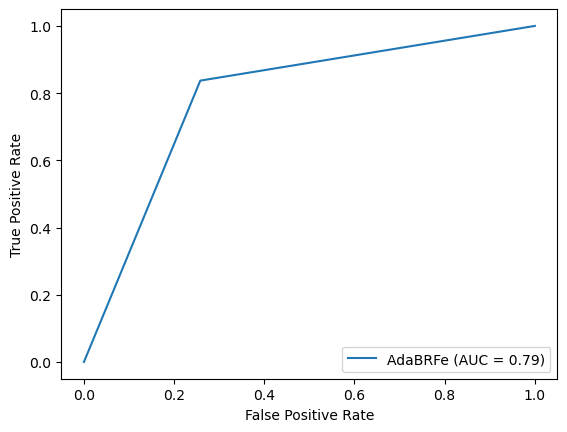

In [533]:
rocplot("AdaBRFe", y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
            نتایج بدست آمده از سایر مدلها: 
        </div>
        <br/>
    </font>
</div>

In [546]:
errors

,accuracy,r2_score,rmsep
SGDClassifier,0.662162,-0.387847,95.0
PerceptronGridsearch,0.648649,-0.443361,96.0
logisticEdited,0.743243,-0.054764,82.0
KNN,0.743243,-0.054764,82.0
AdaBlogestic,0.702703,-0.221305,89.0
AdaB,0.689189,-0.276819,91.0
BagRF,0.702703,-0.221305,89.0
AdaBRFe,0.797297,0.167292,73.0


### ANN

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5 color=yellow>
        <div  align=center>
            نتایج بدست آمده از شبکه عصبی هم جالب نبود: 
        </div>
        <br/>
    </font>
</div>

In [ ]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd

In [575]:
tf.random.set_seed(42)
model = keras.Sequential()
model.add(keras.layers.Input(shape=[50000]))
# model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
metrics=["accuracy"])


In [576]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
6/6 [==============================] - 1s 81ms/step - loss: nan - accuracy: 0.5000                        
Epoch 2/5
6/6 [==============================] - 0s 78ms/step - loss: nan - accuracy: 0.3706
Epoch 3/5
6/6 [==============================] - 0s 80ms/step - loss: nan - accuracy: 0.3706
Epoch 4/5
6/6 [==============================] - 0s 80ms/step - loss: nan - accuracy: 0.3706
Epoch 5/5
6/6 [==============================] - 0s 78ms/step - loss: nan - accuracy: 0.3706


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(), SVC())
clf_gridSearch = GridSearchCV(pipe, param_grid={'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__C': [0.1, 1, 10, 100]}, scoring='f1_macro')
clf_gridSearch.fit(X_train, y_train)


In [12]:
predict = clf_gridSearch.predict(X_test)

In [15]:
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23        31
           1       0.61      1.00      0.76        43

    accuracy                           0.64        74
   macro avg       0.81      0.56      0.49        74
weighted avg       0.78      0.64      0.54        74

[[ 4 27]
 [ 0 43]]
